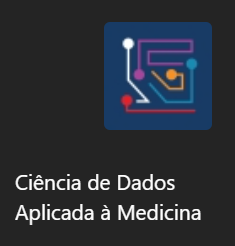

# 🖥️ Processamento de Dados: Vantagens da utilização de Linguagens de Programação

___

Autor: Nuno S. Osório
(email: nosorio@med.uminho.pt; linkedin: https://www.linkedin.com/in/nunososorio/)

Data: 21 e 22 de maio 2024

Versão Interativa: https://tinyurl.com/cienciadados2
___



### Nesta aula, vamos usar computação cloud e a linguagem R para processamento de dados na forma de texto.

Os objectivos definidos para a aprendizagem são:

1. **Identificar vantagens da utilização da liguagem R e de computação cloud para o processamento de dados** 🌐;

2. **Utilizar a liguagem R para manipular matrizes de dados**

2. **Aplicar diferentes formas de normalização de dados e entender a sua importância e impacto** ;

3. **Utilizar python para redução de dimensionalidade e comparar métodos como PCA, t-SNE e UMAP** ☁️;


# Vantagens do R para processamento de dados



## As vantagens que identificamos anteriormente para Python são semelhantes às do R. Com a ajuda da IA, as oportunidades e a facilidade de aprender a programar em R são notáveis. As principais vantagens são:

1. **Código Aberto**: R é uma linguagem de programação de código aberto, o que significa que é livre para usar e modificar.

2. **Bibliotecas Úteis**: R possui uma vasta gama de bibliotecas úteis para análise de dados e visualização.

3. **Reprodutibilidade**: R permite a reprodutibilidade dos resultados, o que é crucial na ciência de dados.

4. **Eficiência**: R é eficiente na manipulação e análise de grandes conjuntos de dados.

Em resumo, R e outras linguagens de programação, como Python, são ferramentas incrivelmente úteis para a ciência de dados, tornando a análise de dados mais acessível e eficiente. 📊



Pode aceder à versão interativa deste documento no Google Colab seguindo este link: https://tinyurl.com/cienciadados2

In [12]:
# Carregar a biblioteca necessária
library(lubridate)

# Obter a hora atual
agora <- format(now(), "%H:%M:%S")

# Obter a versão do R
versao_r <- R.version$version.string

# Imprimir a mensagem
print(paste("Olá MinhoMD! São", agora, ". Estamos a usar o R na versão", versao_r))

[1] "Olá MinhoMD! São 09:16:59 . Estamos a usar o R na versão R version 4.4.0 (2024-04-24)"


# Comandos para manipulação de Tabelas no R

A primeira etapa é importar os dados que queremos analisar para a nossa sessão de R

In [15]:
# Specify the URL of the file
url <- "https://raw.githubusercontent.com/nunososorio/medicaldatascience/main/counts.csv"

# Specify the local filename
filename <- "counts.csv"

# Download the file
download.file(url, destfile = filename)

# Ler o ficheiro CSV com a primeira coluna como nomes das linhas
# A função read.csv lê o ficheiro CSV e cria um data frame (que neste caso é uma matriz)
# O parâmetro row.names = 1 indica que a primeira coluna deve ser usada como nomes das linhas
data <- read.csv(filename, row.names = 1)
data

,Con1,Con2,Con3,Ko1,Ko2,Ko3
,<int>,<int>,<int>,<int>,<int>,<int>
ENSMUSG00000102628,0,0,0,0,0,0
ENSMUSG00000100595,0,0,0,0,0,0
ENSMUSG00000097426,0,0,2,0,0,0
ENSMUSG00000104478,0,0,0,0,0,0
ENSMUSG00000104385,0,0,0,0,0,0
ENSMUSG00000086053,0,0,0,0,0,0
ENSMUSG00000101231,0,0,0,0,0,0
ENSMUSG00000102135,6,0,9,0,12,2
ENSMUSG00000103282,0,0,0,0,0,0


In [16]:
# Remover linhas só com zeros
# A função apply aplica a função fornecida (function(x) any(x != 0)) a cada linha do data frame (1 indica linhas, 2 indicaria colunas)
# O resultado é um vetor lógico que indica quais linhas têm algum valor diferente de zero
# Este vetor lógico é então usado para selecionar as linhas do data frame
data <- data[apply(data, 1, function(x) any(x != 0)), ]
data

,Con1,Con2,Con3,Ko1,Ko2,Ko3
,<int>,<int>,<int>,<int>,<int>,<int>
ENSMUSG00000097426,0,0,2,0,0,0
ENSMUSG00000102135,6,0,9,0,12,2
ENSMUSG00000100764,1,17,8,0,4,12
ENSMUSG00000102095,0,4,0,0,0,2
ENSMUSG00000102534,0,0,3,0,0,0
ENSMUSG00000100480,2,0,18,2,6,4
ENSMUSG00000100025,8,0,6,0,0,0
ENSMUSG00000051285,912,2910,9632,818,3940,7162
ENSMUSG00000103509,0,2,24,0,0,0


In [19]:
# Create a column data frame with multiple samples per condition
metadata <- data.frame(condition = factor(c("control", "control", "control", "knockout", "knockout","knockout")),
                     row.names = colnames(data))

metadata


,condition
,<fct>
Con1,control
Con2,control
Con3,control
Ko1,knockout
Ko2,knockout
Ko3,knockout


# 🖥️ Métodos de Normalização de dados

Os dados em bioinformática e noutras áreas da computação e ciência de dados são tipicamente organizados de forma eficiente em objectos como **vetores**, **matrizes**, **arrays**, **dataframes**, **listas**:

- **Vetores**: É uma conjunto unidimensional de elementos do mesmo tipo.
- **Matrizes**: É uma conjunto bidimensional (contém linhas e colunas) de elementos do mesmo tipo.
- **Array**: É uma coleção de qualquer número de dimensões. Por exemplo uma coleção de matrizes. Cada dimensão em um array é um eixo.
- **Dataframe**: É um conjunto bidimensional (contém linhas e colunas) de elementos de tipos diferentes.
- **Lista**: É uma coleção de elementos que podem ser de diferentes tipos.

# Redução de dimensionalidade



© Nuno S. Osório, 2024
